#S09 T02: Aprenentatge Supervisat - Regressions


Anem a practicar i a familiaritzar-nos amb regressions
## Nivell 1

### - Exercici 1

Crea almenys tres models de regressió diferents per intentar predir el millor possible l’endarreriment dels vols (ArrDelay) de DelayedFlights.csv.


In [272]:
# Tratamiento de datos
# ==============================================================================
import pandas as pd
import numpy as np

# Gráficos
# ==============================================================================
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns

# Preprocesado y modelado
# ==============================================================================
#from scipy.stats import pearsonr
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import scale 
#from sklearn.metrics import r2_score
#from sklearn.metrics import mean_squared_error
#import statsmodels.api as sm
#import statsmodels.formula.api as smf


In [273]:
file="DelayedFlights.csv"
df = pd.read_csv(file,low_memory=False,index_col=0)
df.head()


,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,...,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,2008,1,3,4,2003.0,1955,2211.0,2225,WN,335,...,4.0,8.0,0,N,0,NaN,NaN,NaN,NaN,NaN
1,2008,1,3,4,754.0,735,1002.0,1000,WN,3231,...,5.0,10.0,0,N,0,NaN,NaN,NaN,NaN,NaN
2,2008,1,3,4,628.0,620,804.0,750,WN,448,...,3.0,17.0,0,N,0,NaN,NaN,NaN,NaN,NaN
4,2008,1,3,4,1829.0,1755,1959.0,1925,WN,3920,...,3.0,10.0,0,N,0,2.0,0.0,0.0,0.0,32.0
5,2008,1,3,4,1940.0,1915,2121.0,2110,WN,378,...,4.0,10.0,0,N,0,NaN,NaN,NaN,NaN,NaN


In [274]:
df.columns

Index(['Year', 'Month', 'DayofMonth', 'DayOfWeek', 'DepTime', 'CRSDepTime',
       'ArrTime', 'CRSArrTime', 'UniqueCarrier', 'FlightNum', 'TailNum',
       'ActualElapsedTime', 'CRSElapsedTime', 'AirTime', 'ArrDelay',
       'DepDelay', 'Origin', 'Dest', 'Distance', 'TaxiIn', 'TaxiOut',
       'Cancelled', 'CancellationCode', 'Diverted', 'CarrierDelay',
       'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay'],
      dtype='object')


    Year -> any de la dada format yyyy
    Month -> mes de la dada format mm
    DayofMonth -> dia del mes 1-31
    DayOfWeek -> dia de la setmana 1 (Monday) - 7 (Sunday)
    DepTime -> hora de sortida (local, hhmm)
    CRSDepTime -> hora programada de sortida (local, hhmm)
    ArrTime -> hora de arrivada (local, hhmm)
    CRSArrTime -> hora programda de arrivada (local, hhmm)
    UniqueCarrier -> identificador del operador
    FlightNum -> numero de vol
    TailNum -> matricula del avio
    ActualElapsedTime -> temps de vol total en minuts
    CRSElapsedTime -> temps estimat de vol total en minutos
    AirTime -> temps en el aire en minuts
    ArrDelay -> Difference in minutes between scheduled and actual arrival time. Early arrivals show negative numbers, in minutes
    DepDelay -> Difference in minutes between scheduled and actual departure time.Early departures show negative numbers, in minutes
    Origin -> codi IATA areoport de origen
    Dest -> codi IATA aeroport de dest
    Distance -> distancia entre aeroports (miles)
    TaxiIn -> Wheels down and arrival at the destination airport gate, in minutes
    TaxiOut -> The time elapsed between departure from the origin airport gate and wheels off, in minutes
    Cancelled -> vol cancelat o no
    CancellationCode -> motiu de la cancelacio (A = carrier, B = weather, C = NAS, D = security)
    Diverted -> Desviat 1 = yes, 0 = no
    CarrierDelay -> Retràs degut a l'operador in minutes
    WeatherDelay -> Retràs degut al temps in minutes
    NASDelay -> Retràs degut a NAS in minutes
    SecurityDelay -> Retràs degut motius de seguretat in minutes
    LateAircraftDelay -> Retràs acumulat de l'avió in minutes


Deveriamos eliminar los vuelos cancelados y Redirigidos ya que afectarian a nuestra prediccion

In [275]:
print(pd.value_counts(df.Cancelled))
print(pd.value_counts(df.Diverted))

0    1936125
1        633
Name: Cancelled, dtype: int64
0    1929004
1       7754
Name: Diverted, dtype: int64


Eliminamos los cancelados y desviado para evitar que interfiran en la predicion

In [276]:
df = df.loc[(df.Cancelled == 0) & (df.Diverted == 0 )]
df.isna().sum()

Year                      0
Month                     0
DayofMonth                0
DayOfWeek                 0
DepTime                   0
CRSDepTime                0
ArrTime                   0
CRSArrTime                0
UniqueCarrier             0
FlightNum                 0
TailNum                   3
ActualElapsedTime         0
CRSElapsedTime            0
AirTime                   0
ArrDelay                  0
DepDelay                  0
Origin                    0
Dest                      0
Distance                  0
TaxiIn                    0
TaxiOut                   0
Cancelled                 0
CancellationCode          0
Diverted                  0
CarrierDelay         680883
WeatherDelay         680883
NASDelay             680883
SecurityDelay        680883
LateAircraftDelay    680883
dtype: int64

Tenemos algunos delays sin valor, supondremos que el valor es 0 por eso no esta instanciado asi que los instanciaremos a 0

In [277]:
for column in ['CarrierDelay','WeatherDelay','NASDelay','SecurityDelay','SecurityDelay','LateAircraftDelay']:
    df[column]=df[column].fillna(0)
df.isna().sum()

Year                 0
Month                0
DayofMonth           0
DayOfWeek            0
DepTime              0
CRSDepTime           0
ArrTime              0
CRSArrTime           0
UniqueCarrier        0
FlightNum            0
TailNum              3
ActualElapsedTime    0
CRSElapsedTime       0
AirTime              0
ArrDelay             0
DepDelay             0
Origin               0
Dest                 0
Distance             0
TaxiIn               0
TaxiOut              0
Cancelled            0
CancellationCode     0
Diverted             0
CarrierDelay         0
WeatherDelay         0
NASDelay             0
SecurityDelay        0
LateAircraftDelay    0
dtype: int64

Seleccionamos las columnas con retraso

In [278]:
df['Delayed'] = (df.ArrDelay>0) 



Eliminamos algunas columnas que no usuaremos 

In [279]:
df.drop(['Year', 'DayofMonth','CRSDepTime','CRSArrTime','DepTime','Cancelled','CancellationCode','Diverted','ArrDelay'], axis=1, inplace=True)


In [280]:
le_UniqueCarrier = preprocessing.LabelEncoder()
df['label_UniqueCarrier'] = le_UniqueCarrier.fit_transform(df.UniqueCarrier.values)
le_Origin = preprocessing.LabelEncoder()
df['label_Origin'] = le_Origin.fit_transform(df.Origin.values)
le_Dest = preprocessing.LabelEncoder()
df['label_Dest'] = le_Dest.fit_transform(df.Dest.values)
le_TailNum  = preprocessing.LabelEncoder()
df['label_TailNum'] = le_Dest.fit_transform(df.TailNum.values)
df.drop(['UniqueCarrier', 'Origin','Dest','TailNum'], axis=1, inplace=True)
 



In [281]:
df['ElapsedDelay']=df.ActualElapsedTime-df.CRSElapsedTime
df.drop(['ActualElapsedTime', 'CRSElapsedTime'], axis=1, inplace=True)


In [282]:
df.columns
df.head()

,Month,DayOfWeek,ArrTime,FlightNum,AirTime,DepDelay,Distance,TaxiIn,TaxiOut,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,Delayed,label_UniqueCarrier,label_Origin,label_Dest,label_TailNum,ElapsedDelay
0,1,4,2211.0,335,116.0,8.0,810,4.0,8.0,0.0,0.0,0.0,0.0,0.0,False,17,135,284,3756,-22.0
1,1,4,1002.0,3231,113.0,19.0,810,5.0,10.0,0.0,0.0,0.0,0.0,0.0,True,17,135,284,4116,-17.0
2,1,4,804.0,448,76.0,8.0,515,3.0,17.0,0.0,0.0,0.0,0.0,0.0,True,17,140,48,1948,6.0
4,1,4,1959.0,3920,77.0,34.0,515,3.0,10.0,2.0,0.0,0.0,0.0,32.0,True,17,140,48,2129,0.0
5,1,4,2121.0,378,87.0,25.0,688,4.0,10.0,0.0,0.0,0.0,0.0,0.0,True,17,140,149,3839,-14.0


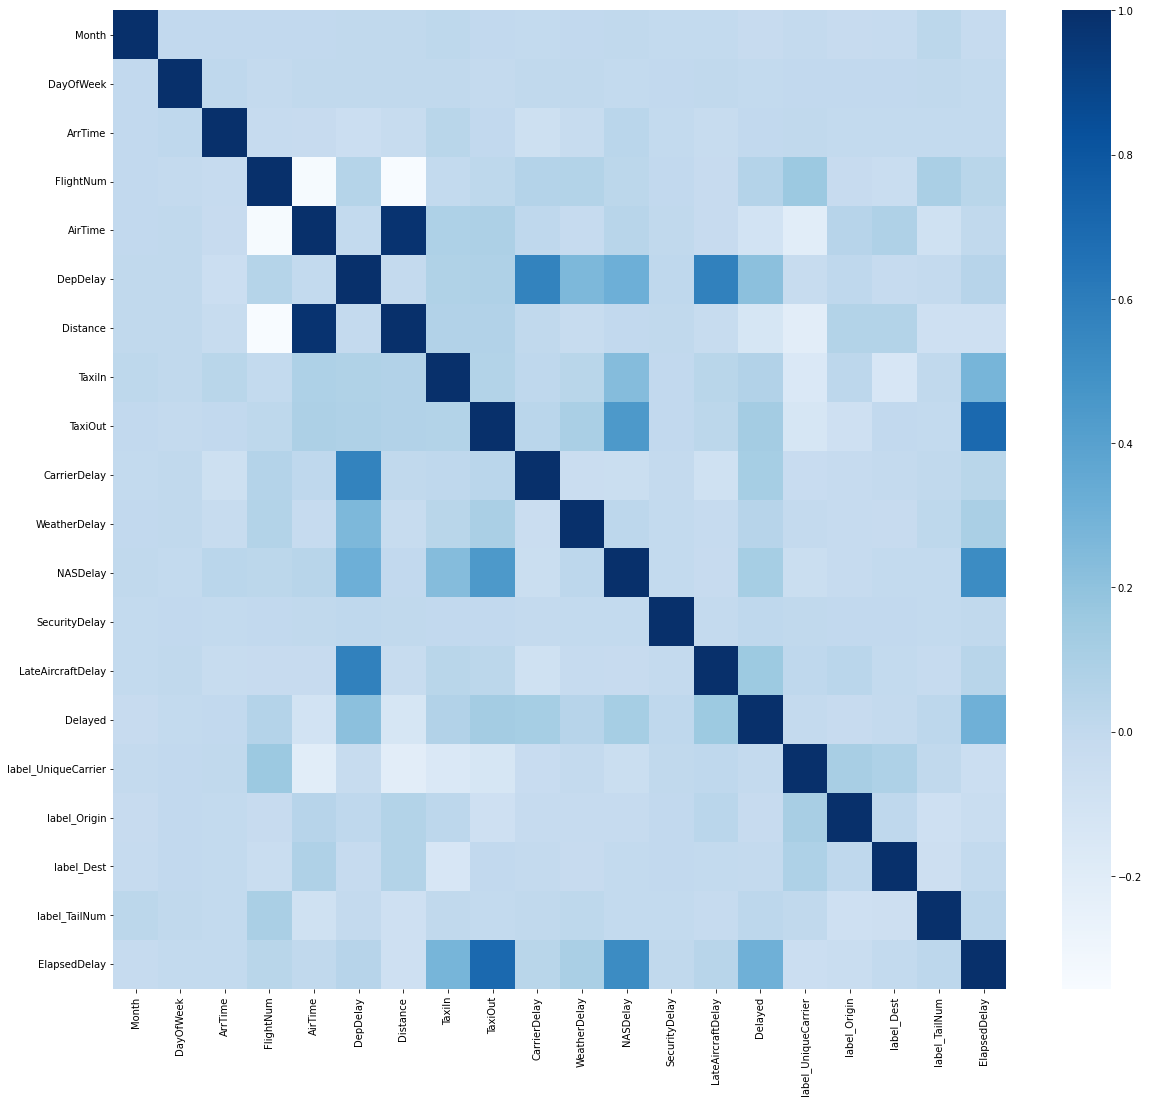

In [283]:
plt.figure(figsize=(20,18))
corrMatrix = df.corr()
sns.heatmap(corrMatrix,  cmap=plt.cm.Blues)
plt.show()

In [284]:
# División de los datos en train y test
# ==============================================================================


X = df.drop(['Delayed'],axis=1)
y = df.Delayed.values

#scale predictor variables
pca = PCA()
X_reduced = pca.fit_transform(scale(X))

#define cross validation method
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)

regr = LinearRegression()
mse = []

# Calculate MSE with only the intercept
score = -1*model_selection.cross_val_score(regr,
           np.ones((len(X_reduced),1)), y, cv=cv,
           scoring='neg_mean_squared_error').mean()    
mse.append(score)

# Calculate MSE using cross-validation, adding one component at a time
for i in np.arange(1, 6):
    score = -1*model_selection.cross_val_score(regr,
               X_reduced[:,:i], y, cv=cv, scoring='neg_mean_squared_error').mean()
    mse.append(score)
    
# Plot cross-validation results    
plt.plot(mse)
plt.xlabel('Number of Principal Components')
plt.ylabel('MSE')
plt.title('hp')


NameError: name 'RepeatedKFold' is not defined

In [ ]:
# Creación del modelo
# ==============================================================================
X_train, X_test, y_train, y_test = train_test_split(principalDf, y, test_size=0.2, shuffle=True, random_state=1234)
modelo = LinearRegression()
modelo.fit(X = X_train, y = y_train)


LinearRegression()

### - Exercici 2

Compara’ls en base al MSE i al R2 .

### - Exercici 3

Entrena’ls utilitzant els diferents paràmetres que admeten.

### - Exercici 4

Compara el seu rendiment utilitzant l’aproximació traint/test o utilitzant totes les dades (validació interna)

## Nivell 2

### - Exercici 5

Realitza algun procés d’enginyeria de variables per millorar-ne la predicció


## Nivell 3

### - Exercici 6

No utilitzis la variable DepDelay a l’hora de fer prediccions

https://datapeaker.com/big-data/principales-bibliotecas-de-python-para-el-procesamiento-de-imagenes-en-2021/
https://www.cienciadedatos.net/documentos/py10-regresion-lineal-python.html
